In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import plot_is
import yt

In [3]:
cd /project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin


/global/homes/d/dorislee/mypackages/yt/units/yt_array.py:795: RuntimeWarning: invalid value encountered in divide
  return YTArray(super(YTArray, self).__div__(ro))



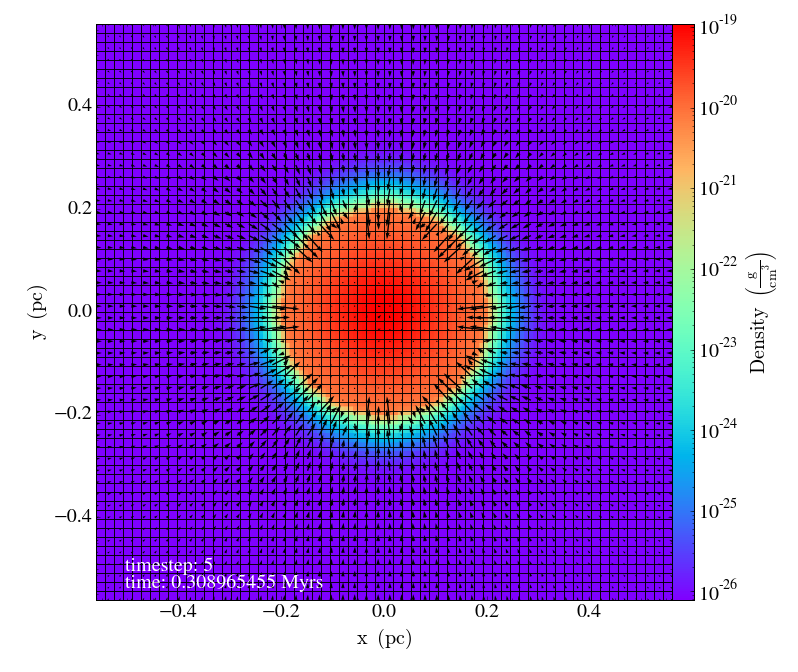


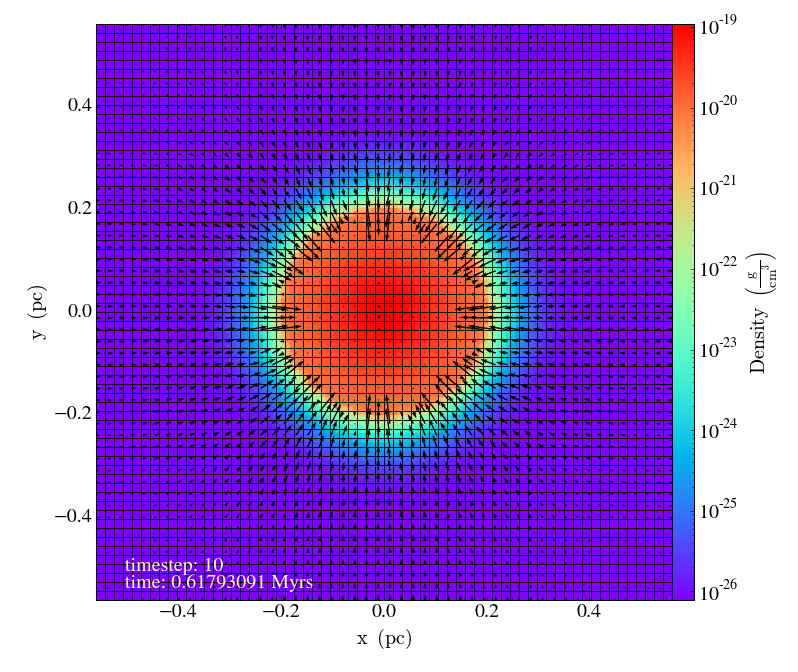


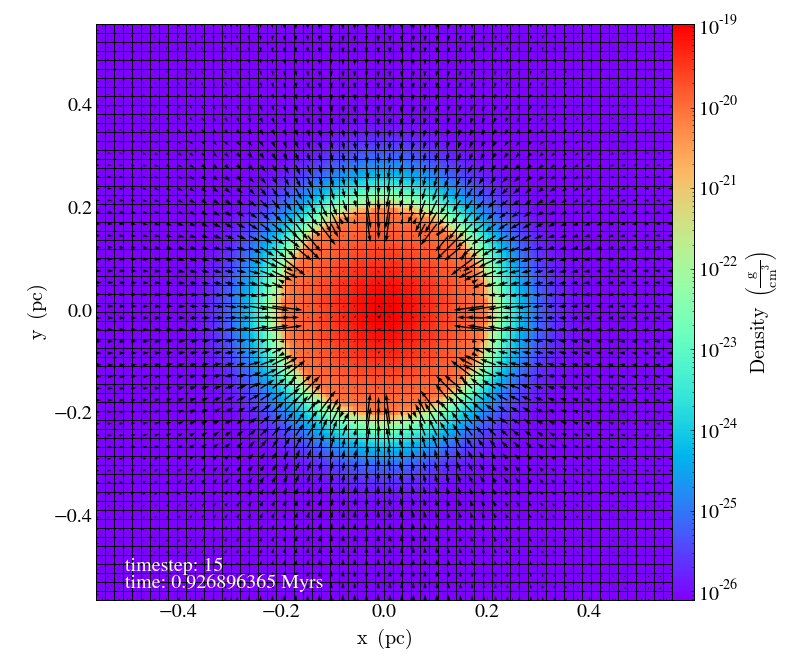


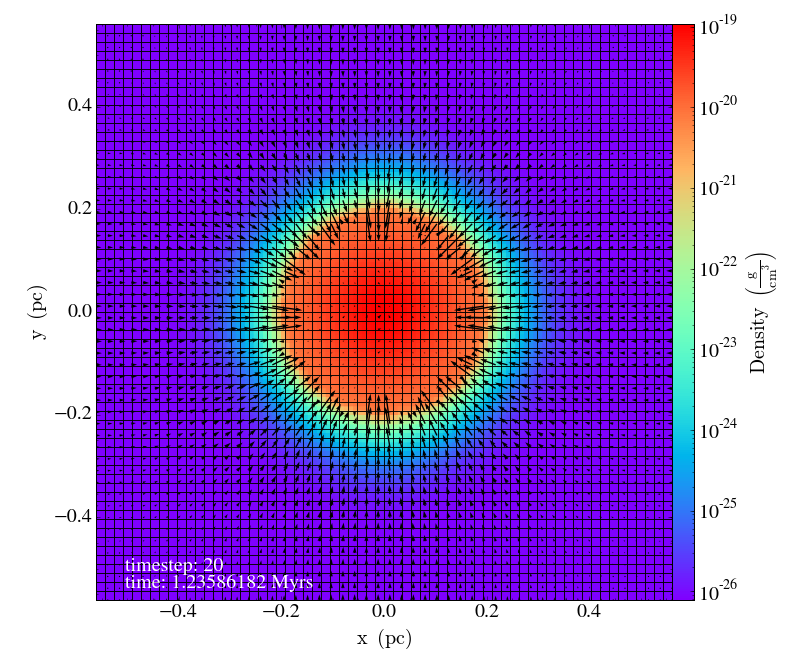


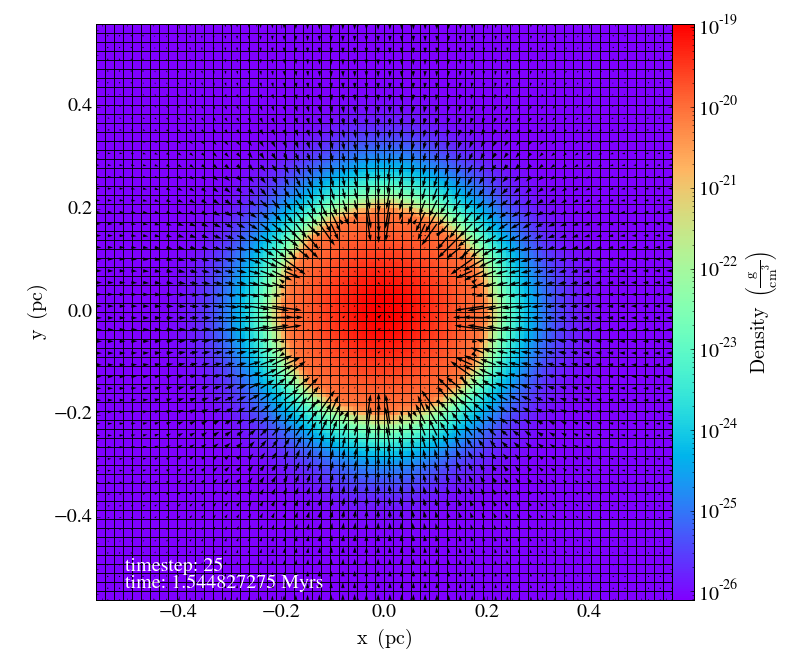

In [4]:
for i in np.arange(1,27):
    if i%5==0:
        plot_is.plot_time_slice("density",i)

So maybe the file has changed to ic_sink rather than ic_part 

Code stuck here, so I changed the name of ic_part to ic_sink 

Looking inside the file clump_finder.f90, clump_finder looks like a HOD halo finder kind of thing, I think the sink particple threshold uses clump finder to find density anomalies in the simulation and then put a sink particle there or somethign 

I am planning to put in a density_threshold as my criterion, but I am looking at density peaks in the previous simulation at each step to see how the density peak evolves (numerical values) 

In [16]:
ds.covering_grid?

In [5]:
ds= yt.load("output_{0}/info_{0}.txt".format(str(1).zfill(5)))
all_data_level_8 = ds.covering_grid(level=8, left_edge=[0,0.0,0.0],dims=[64, 64, 64])
all_data_level_8['density'].shape

(64, 64, 64)

In [10]:
all_data_level_8['density'].max()

7.83502940287e-27 g/cm**3

In [13]:
all_data_level_7 = ds.covering_grid(level=7, left_edge=[0,0.0,0.0],dims=[64, 64, 64])

In [14]:
all_data_level_7['density']

YTArray([[[  7.83502940e-27,   7.83502940e-27,   7.83502940e-27, ...,
           7.83502940e-27,   7.83502940e-27,   7.83502940e-27],
        [  7.83502940e-27,   7.83502940e-27,   7.83502940e-27, ...,
           7.83502940e-27,   7.83502940e-27,   7.83502940e-27],
        [  7.83502940e-27,   7.83502940e-27,   7.83502940e-27, ...,
           7.83502940e-27,   7.83502940e-27,   7.83502940e-27],
        ..., 
        [  7.83502940e-27,   7.83502940e-27,   7.83502940e-27, ...,
           7.83502940e-27,   7.83502940e-27,   7.83502940e-27],
        [  7.83502940e-27,   7.83502940e-27,   7.83502940e-27, ...,
           7.83502940e-27,   7.83502940e-27,   7.83502940e-27],
        [  7.83502940e-27,   7.83502940e-27,   7.83502940e-27, ...,
           7.83502940e-27,   7.83502940e-27,   7.83502940e-27]],

       [[  7.83502940e-27,   7.83502940e-27,   7.83502940e-27, ...,
           7.83502940e-27,   7.83502940e-27,   7.83502940e-27],
        [  7.83502940e-27,   7.83502940e-27,   7.83502940e

In [15]:
all_data_level_7['density'].max()

7.83502940287e-27 g/cm**3

For some strange reason this only contains data for the outer portion of the cloud and not the inner portion, not too sure why

Anyways I will just use what I have for \rho_c which is 0.02806 code density units and go a bit more than that so 0.03 as my density threshold (1.176e-19 g/cm^3)

Okay so that warning goes away 

sink_particle.f90 has a nice description of how the sink particle is created which mkes sense

In [1]:
cd /project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin


/global/homes/d/dorislee/mypackages/yt/units/yt_array.py:795: RuntimeWarning: invalid value encountered in divide
  return YTArray(super(YTArray, self).__div__(ro))



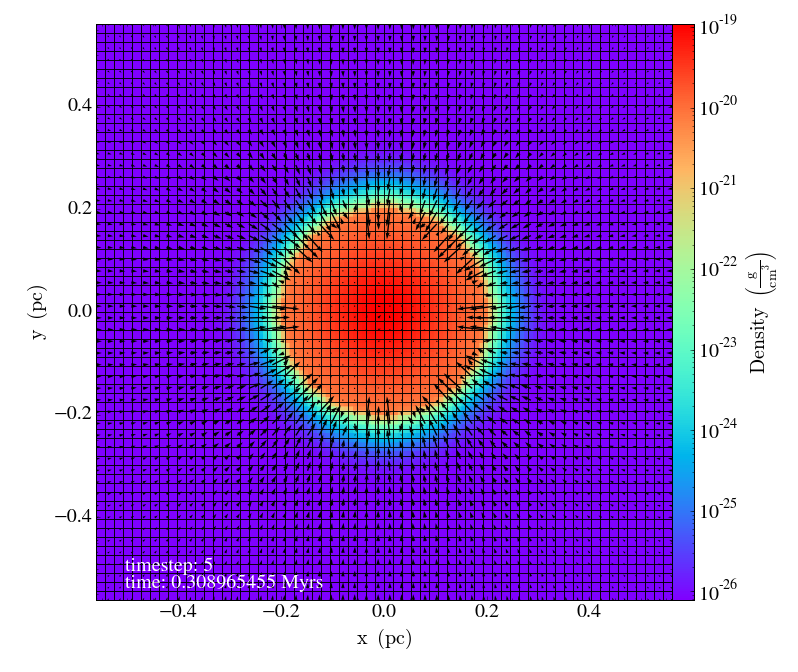

In [4]:
# for i in np.arange(1,10):
#     if i%5==0:
plot_is.plot_time_slice("density",5)